# Working with MEG dataset
MEG dataset from THINGS initiative: https://openneuro.org/datasets/ds004212/versions/2.0.1
### Training data partition
The data is .fif file which needs to be converted into a rather easy to use .npy array.
We will use mne library for this: https://mne.tools/dev/index.html 


We collected extensively sampled object representations using magnetoencephalography (MEG). To this end, we drew on the THINGS database (Hebart et al., 2019), a richly-annotated database of 1,854 object concepts representative of the American English language which contains 26,107 manually-curated naturalistic object images.

ERP = event-related potential; signal with respect to some event
VEP = ERP for visual stimuli



27084 events, 281 time points, 271 channels

## Here we perform clustering experiements

In [2]:
import numpy as np  
import mne, os
import matplotlib.pyplot as plt
import pandas as pd
# from tqdm import tqdm
import matplotlib.image as mpimg
# import nimfa
from sklearn.cluster import KMeans

In [3]:
channel_picks               = ['O','T','P'] 
preproc_dir = '../preprocessed'

n_participants = 3
def load_epochs(preproc_dir,all_epochs = []):
    for p in range(1,n_participants+1):
        epochs = mne.read_epochs(f'{preproc_dir}/preprocessed_P{str(p)}-epo.fif', preload=False)
        all_epochs.append(epochs)
    return all_epochs

def plot_erfs(epochs,n_sessions,name):
    ctf_layout = mne.find_layout(epochs.info)
    picks_epochs = [epochs.ch_names[i] for i in np.where([s[2]==name for s in epochs.ch_names])[0]]
    picks = np.where([i[2]==name for i in ctf_layout.names])[0]

    # get evoked data
    for s in range(n_sessions):    
        evoked = epochs[(epochs.metadata['trial_type']=='test') & (epochs.metadata['session_nr']==s+1)].average()
        evoked.pick_channels(ch_names=picks_epochs)
        plt.plot(epochs.times*1000,np.mean(evoked.data.T,axis=1),lw=0.5,alpha=0.4)
    evoked = epochs[(epochs.metadata['trial_type']=='test')].average()
    evoked.pick_channels(ch_names=picks_epochs)

    # plot ERFs for selected sensor group
    plt.plot(epochs.times*1000,np.mean(evoked.data.T,axis=1),lw=1)
    plt.xlim([epochs.times[0]*1000,epochs.times[len(epochs.times)-1]*1000])
    plt.ylim([-0.6,0.6])
    # plt.['right'].set_visible(False)
    # plt.spines['top'].set_visible(False)

    #  plot sensor locations
    # ax2.plot(ctf_layout.pos[:,0],ctf_layout.pos[:,1],color='gainsboro',marker='.',linestyle='',markersize=5)
    # ax2.plot(ctf_layout.pos[picks,0],ctf_layout.pos[picks,1],color='grey',marker='.',linestyle='',markersize=5)
    # ax2.set_aspect('equal')
    plt.axis('off')


In [4]:
all_epochs = load_epochs(preproc_dir)

Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/MEG/notebooks/../preprocessed/preprocessed_P1-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/MEG/notebooks/../preprocessed/preprocessed_P1-epo-1.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/MEG/notebooks/../preprocessed/preprocessed_P1-epo-2.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/MEG/notebooks/../preprocessed/preprocessed_P1-epo-3.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
    

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

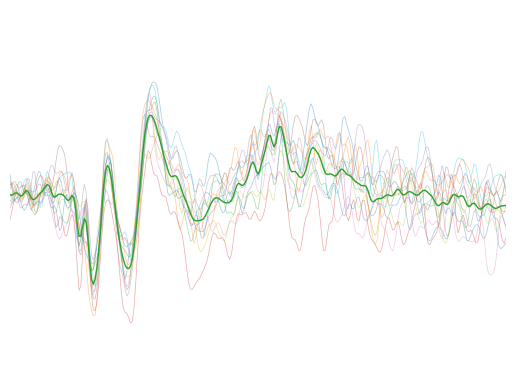

In [5]:
n_sessions = 12
plot_erfs(all_epochs[1],n_sessions,'O')

In [6]:
epochs = all_epochs[2]

In [7]:
epochs.metadata

trial_type  image_nr  category_nr  exemplar_nr  test_image_nr  \
0            exp        66            6            6            NaN   
1            exp     19722         1644            6            NaN   
2            exp      9990          833            6            NaN   
3            exp     18114         1510            6            NaN   
4            exp     21630         1803            6            NaN   
...          ...       ...          ...          ...            ...   
27043       test     22509          874           13           61.0   
27044        exp      1928          161            8            NaN   
27045        exp     12380         1032            8            NaN   
27046        exp      4736          395            8            NaN   
27047        exp     12308         1026            8            NaN   

       things_category_nr  things_image_nr  things_exemplar_nr  \
0                     6.0             77.0                 6.0   
1                  1644.0          23212.0                 6.0   
2                   833.0          11909.0                 6.0   
3                  1510.0          21355.0                 6.0   
4                  1803.0          25403.0                 6.0   
...                   ...              ...                 ...   
27043               874.0          12520.0                14.0   
27044               161.0           2461.0                 8.0   
27045              1032.0          14716.0                 8.0   
27046               395.0           5685.0                 8.0   
27047              1026.0          14624.0                 8.0   

                                         image_path   onset    image_on  \
0      images_meg/air_mattress/air_mattress_06s.jpg    3.00    3.007379   
1                      images_meg/tent/tent_06s.jpg    4.60    4.608000   
2                      images_meg/iron/iron_06s.jpg    5.90    6.158647   
3                images_meg/speaker/speaker_06s.jpg    7.55    7.559094   
4                      images_meg/weed/weed_06s.jpg    9.05    9.109738   
...                                             ...     ...         ...   
27043                images_test_meg/kimono_14s.jpg  333.25  333.271450   
27044                  images_meg/bomb/bomb_08s.jpg  334.60  334.821982   
27045                images_meg/mouth/mouth_08s.jpg  335.90  336.189182   
27046          images_meg/computer/computer_08s.jpg  337.45  337.473051   
27047      images_meg/motorcycle/motorcycle_08s.jpg  338.90  339.023669   

        image_off  responded  key_id  key_time  RT  session_nr  run_nr  
0        3.507551          0     NaN       NaN NaN           1       1  
1        5.108164          0     NaN       NaN NaN           1       1  
2        6.658820          0     NaN       NaN NaN           1       1  
3        8.059242          0     NaN       NaN NaN           1       1  
4        9.609925          0     NaN       NaN NaN           1       1  
...           ...        ...     ...       ...  ..         ...     ...  
27043  333.771659          0     NaN       NaN NaN          12      10  
27044  335.322292          0     NaN       NaN NaN          12      10  
27045  336.689494          0     NaN       NaN NaN          12      10  
27046  337.973265          0     NaN       NaN NaN          12      10  
27047  339.523893          0     NaN       NaN NaN          12      10  

[27048 rows x 18 columns]

In [8]:
name = channel_picks[0]
print(name, channel_picks)
# ctf_layout = mne.find_layout(epochs.info)
picks_epochs = [epochs.ch_names[i] for i in np.where([s[2]==name for s in epochs.ch_names])[0]]
ep1 = epochs[epochs.metadata['trial_type']=='exp']  
ep1.load_data() 
ep1.pick_channels(ch_names=picks_epochs); # supress output


O ['O', 'T', 'P']
Loading data for 22248 events and 281 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [9]:
NOS_CONCEPTS = 1854
NOS_IMAGE_PER_CONCEPT = 12
NOS_CHANNELS_OPT = 39
NOS_TIME_POINTS = 281
time_points = epochs.times 

In [10]:
# Initialize the concept_epochs array with zeros
concept_epochs = np.zeros((NOS_IMAGE_PER_CONCEPT, NOS_CONCEPTS, NOS_TIME_POINTS, NOS_CHANNELS_OPT))

# Extract all data matching the condition in one go
indices = ep1.metadata['category_nr'].values - 1  # Adjust index (assuming category_nr starts at 1)
concept_epochs[:, indices, :, :] = ep1._data.transpose(0, 2, 1)

In [11]:
concept_epochs.shape

(12, 1854, 281, 39)

In [12]:
average_concept_epochs = concept_epochs.mean(axis = 0)
average_concept_epochs.shape

(1854, 281, 39)

In [13]:
# # z_scored_epochs = np.zeros_like(average_concept_epochs)
# for channel in range(NOS_CHANNELS_OPT):
#     mean = average_concept_epochs[:,channel,:].mean()
#     stdev = average_concept_epochs[:,channel,:].std()
#     average_concept_epochs[:,channel,:] = (average_concept_epochs[:,channel,:] - mean) / stdev

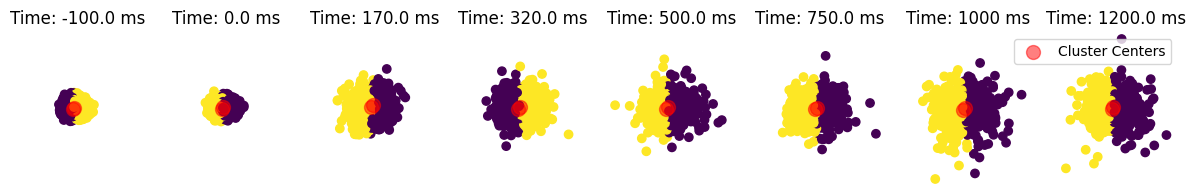

In [14]:
times = [-0.1,0.0,0.170, 0.320, 0.5, 0.75, 1, 1.2]
category27 = pd.read_csv('../data/category27_manual.tsv', sep='\t')
f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))   
for i,t in enumerate(times):
    index = epochs.times == t
    data = average_concept_epochs[:, index, :].squeeze() 
    # print(data.shape)
    kmeans = KMeans(n_clusters=2).fit(data)
    labels = kmeans.labels_
    # Get cluster centers
    centers = kmeans.cluster_centers_  # Shape: (2, 39)

    # Example Output
    # print("Labels Shape:", labels.shape)  # (1854,)
    # print("Cluster Centers Shape:", centers.shape)  # (2, 39)

    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    # Reduce to 2D for visualization
    pca = PCA(n_components=2, random_state= 42)
    data_2d = pca.fit_transform(data)
    # print(data_2d.shape)  
    axes[i].scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
    axes[i].scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, label='Cluster Centers')
    axes[i].set_title(f"Time: {t*1000} ms")
    axes[i].axis('off')
plt.legend()
plt.show()

In [15]:
# from tqdm import tqdm

# for category_name in tqdm(category27.columns):
#     times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
#     # category_name = 'animal'
#     f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))   

#     for i,t in tqdm(enumerate(times)):
#         index = epochs.times == t
#         data = average_concept_epochs[:, index, :].squeeze() 
#         # print(data.shape)
#         kmeans = KMeans(n_clusters=2, random_state= 42).fit(data)
#         labels = kmeans.labels_
#         # Get cluster centers
#         centers = kmeans.cluster_centers_  # Shape: (2, 39)
#         index_0 = np.where(labels == 0)[0]
#         index_1 = np.where(labels == 1)[0]
#         names_0 = []
#         names_1 = []

#         category = np.where(category27[category_name] == 1)[0]
#         category_0 = len(np.intersect1d(category, index_0))
#         category_1 = len(np.intersect1d(category, index_1))
#         # print(f"division of category: {category_0} vs {category_1}") 
#         # plot these divisions are bar plot
#         axes[i].bar(['Cluster 0', 'Cluster 1'], [category_0, category_1])
#         axes[i].set_title(f"Time: {t*1000} ms") 
#         axes[0].set_ylabel(f'Number of images {category_name}')
#         axes[i].set_xlabel('Cluster')
#     plt.show();

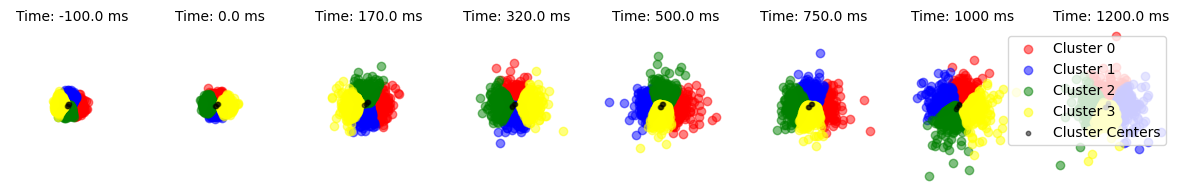

In [16]:
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))   
for i,t in enumerate(times):
    index = epochs.times == t
    data = average_concept_epochs[:, index, :].squeeze() 
    # print(data.shape)
    kmeans = KMeans(n_clusters=4).fit(data)
    labels = kmeans.labels_
    # Get cluster centers
    centers = kmeans.cluster_centers_
    
    index_0 = np.where(labels == 0)[0]
    index_1 = np.where(labels == 1)[0]
    index_2 = np.where(labels == 2)[0]
    index_3 = np.where(labels == 3)[0]

    pca = PCA(n_components=2, random_state= 42)
    data_2d = pca.fit_transform(data)
    axes[i].scatter(data_2d[index_0, 0], data_2d[index_0, 1], c='red', label='Cluster 0', alpha=0.5)
    axes[i].scatter(data_2d[index_1, 0], data_2d[index_1, 1], c='blue', label='Cluster 1', alpha=0.5)  
    axes[i].scatter(data_2d[index_2, 0], data_2d[index_2, 1], c='green', label='Cluster 2', alpha=0.5)
    axes[i].scatter(data_2d[index_3, 0], data_2d[index_3, 1], c='yellow', label='Cluster 3', alpha=0.5)
    axes[i].scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.5, label='Cluster Centers')
    axes[i].set_title(f"Time: {t*1000} ms", fontsize=10)
    axes[i].axis('off')
plt.legend()        
plt.show()

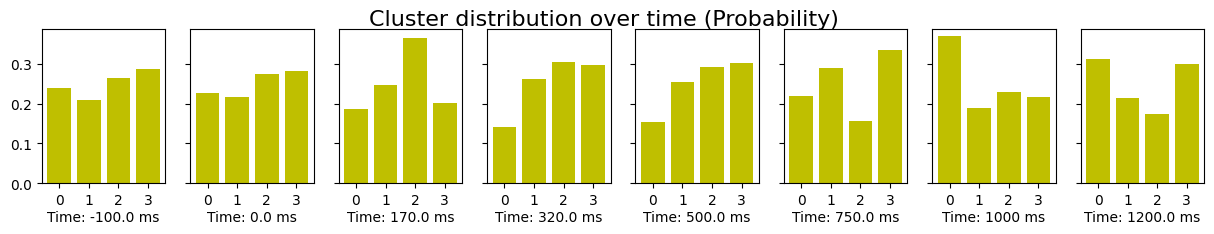

In [17]:

times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
indices = {}
probabilites = {}
f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(15, 2))  
# plt.title('Cluster distribution over time') as the main title
plt.suptitle('Cluster distribution over time (Probability)', fontsize=16)
for i, t in (enumerate(times)):
    index = epochs.times == t
    data = average_concept_epochs[:, index, :].squeeze() 
    # print(data.shape)
    kmeans = KMeans(n_clusters=4, random_state=42).fit(data)
    labels = kmeans.labels_
    # # Get cluster centers
    centers = kmeans.cluster_centers_
    index_0 = np.where(labels == 0)[0]
    index_1 = np.where(labels == 1)[0]
    index_2 = np.where(labels == 2)[0]
    index_3 = np.where(labels == 3)[0]
    indices[t] = [index_0, index_1, index_2, index_3]
    probabilites[t] = np.array([len(index_0), len(index_1), len(index_2), len(index_3)])/sum([len(index_0), len(index_1), len(index_2), len(index_3)])
    axes[i].bar(['0', '1', '2', '3'], probabilites[t], color = 'y')
    axes[i].set_title(f"Time: {t*1000} ms", y = -0.3, fontsize=10)   
plt.show()


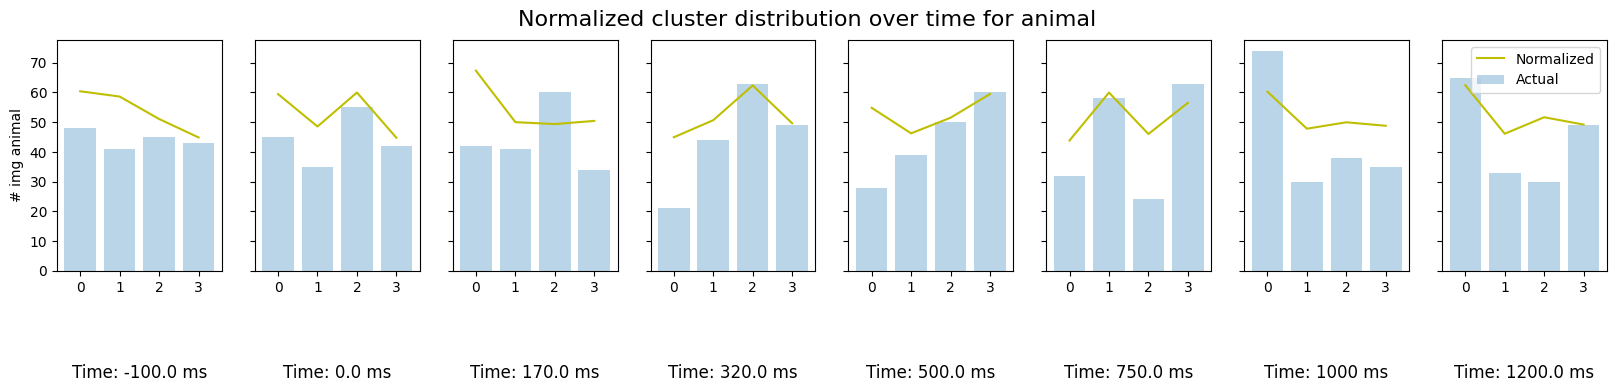

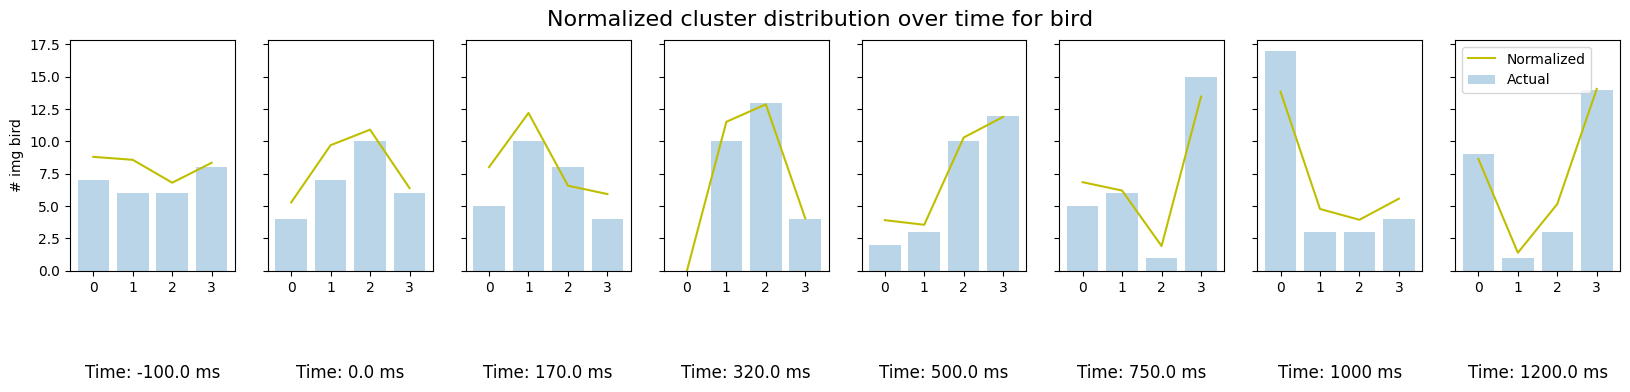

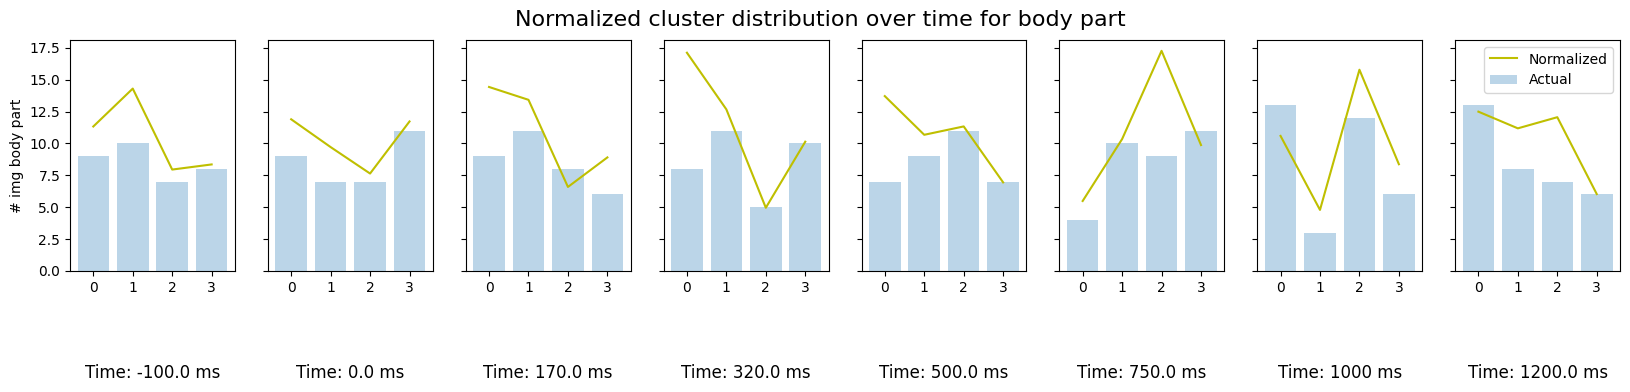

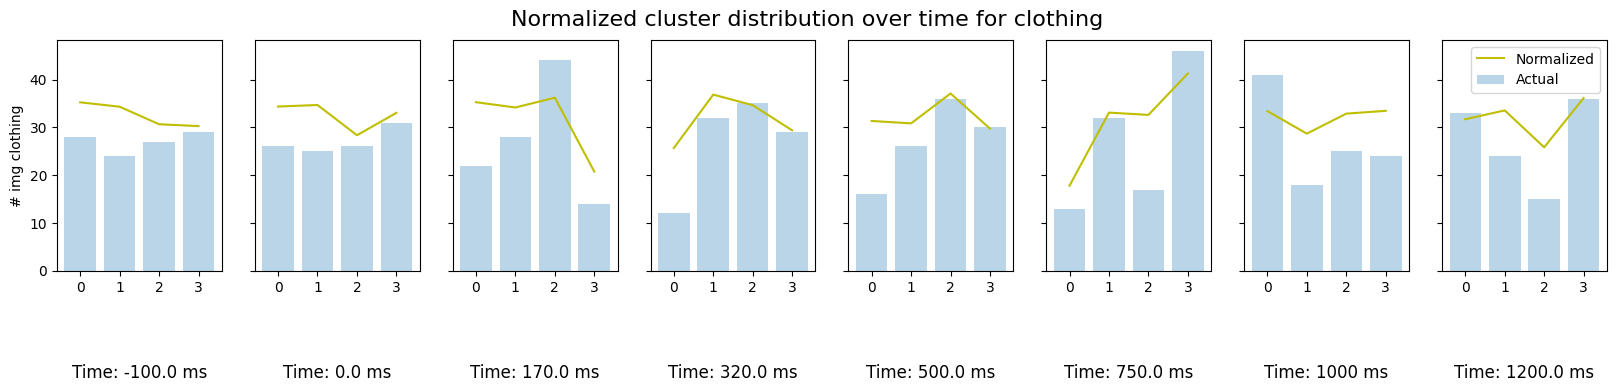

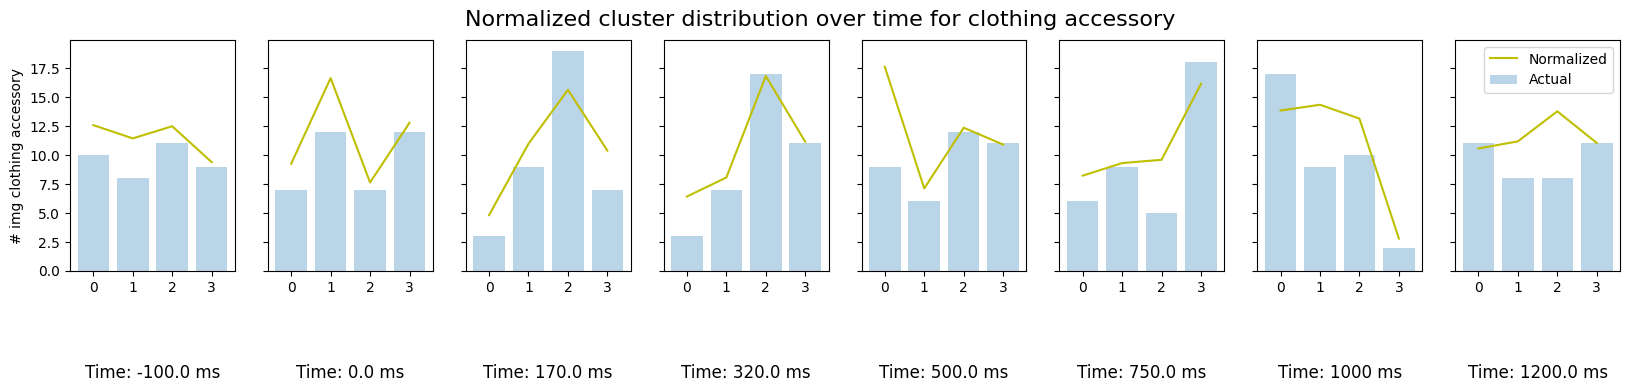

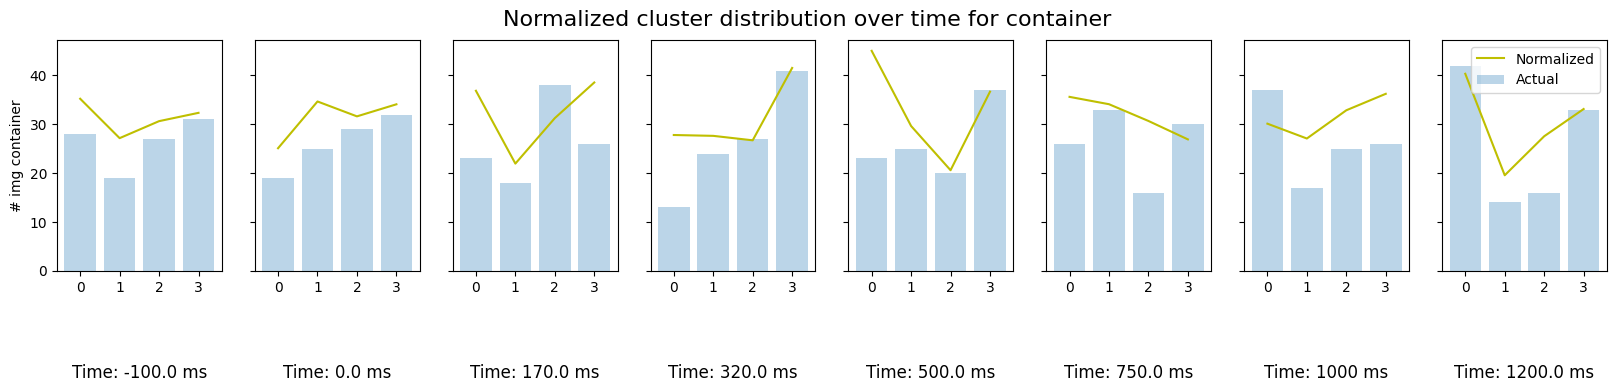

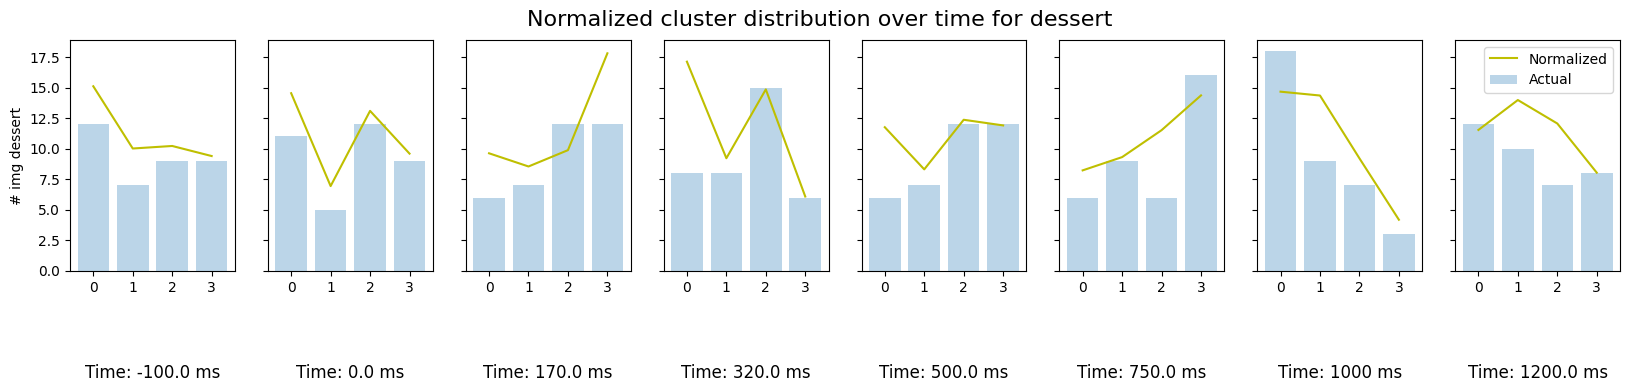

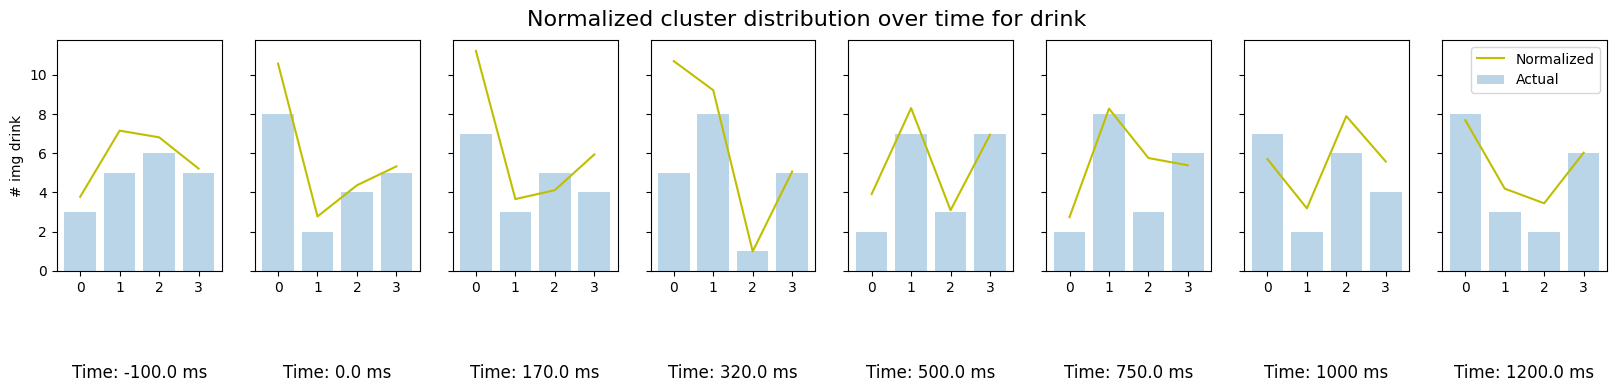

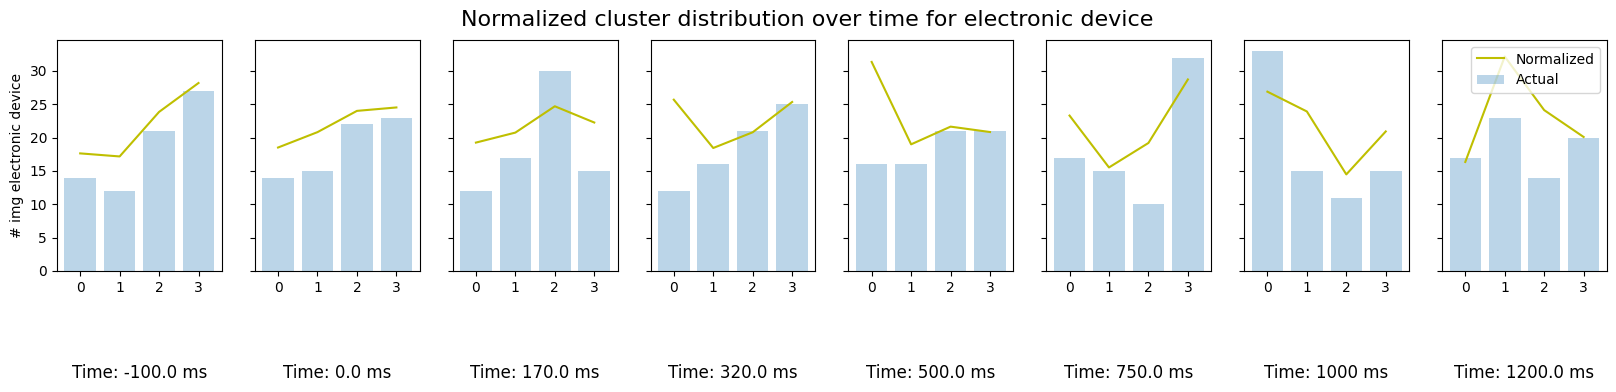

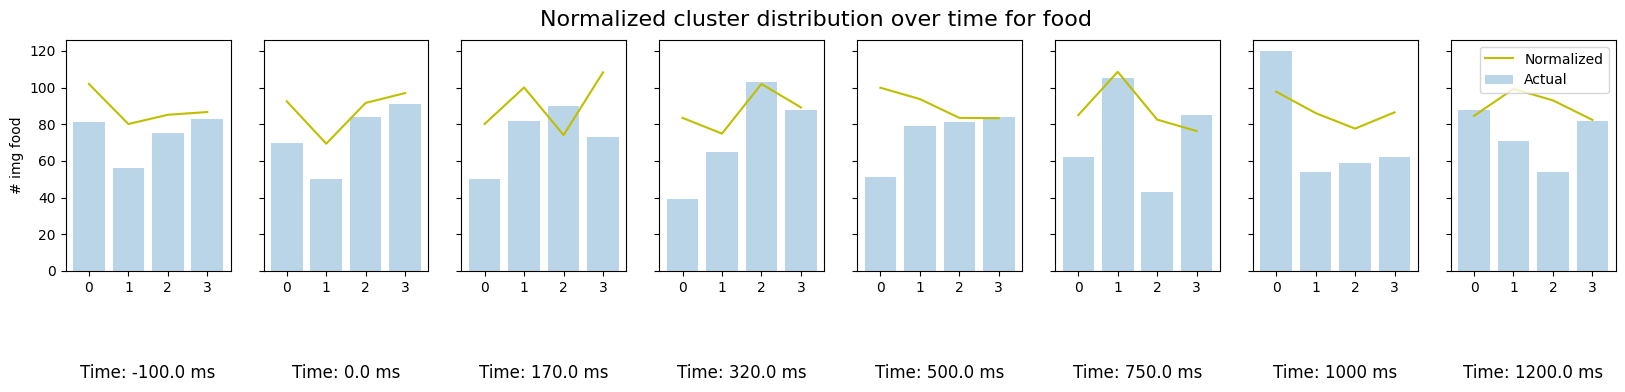

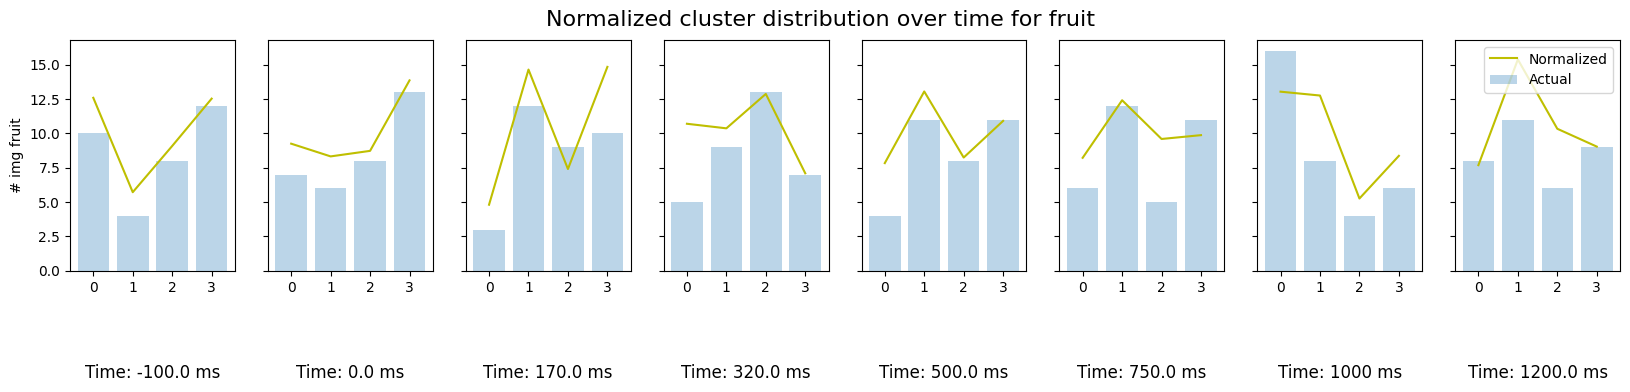

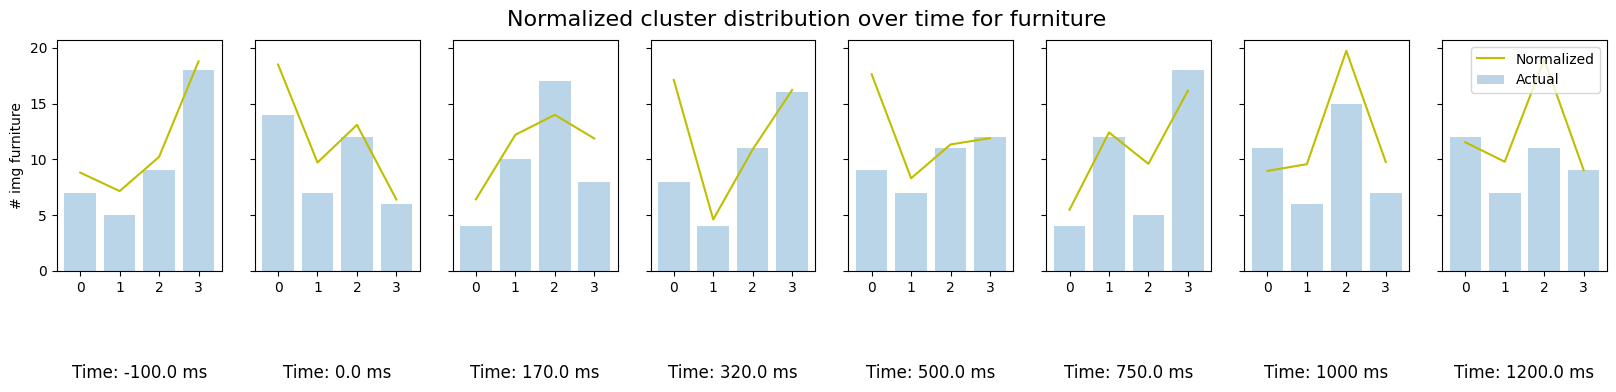

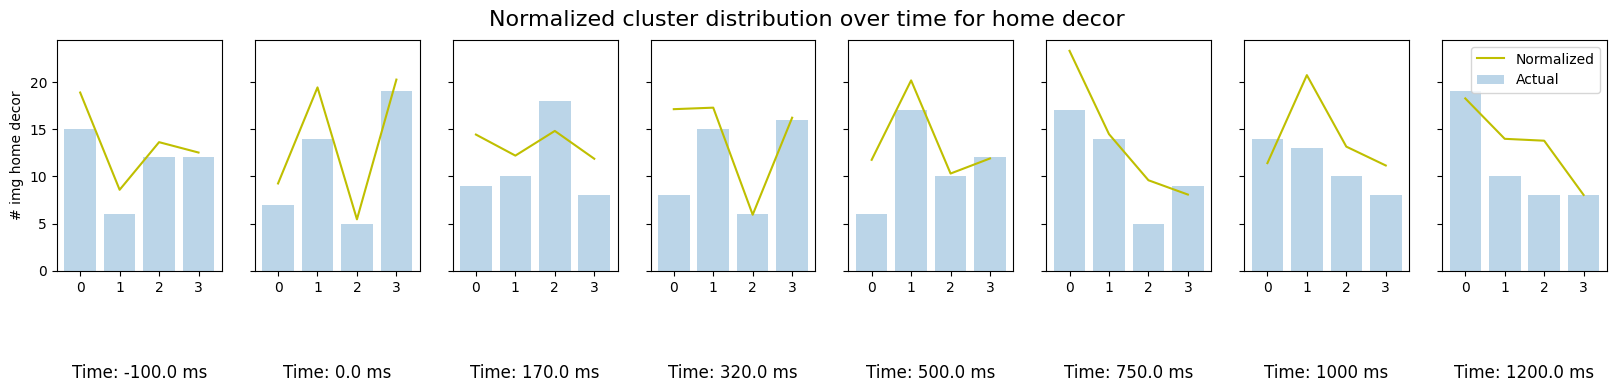

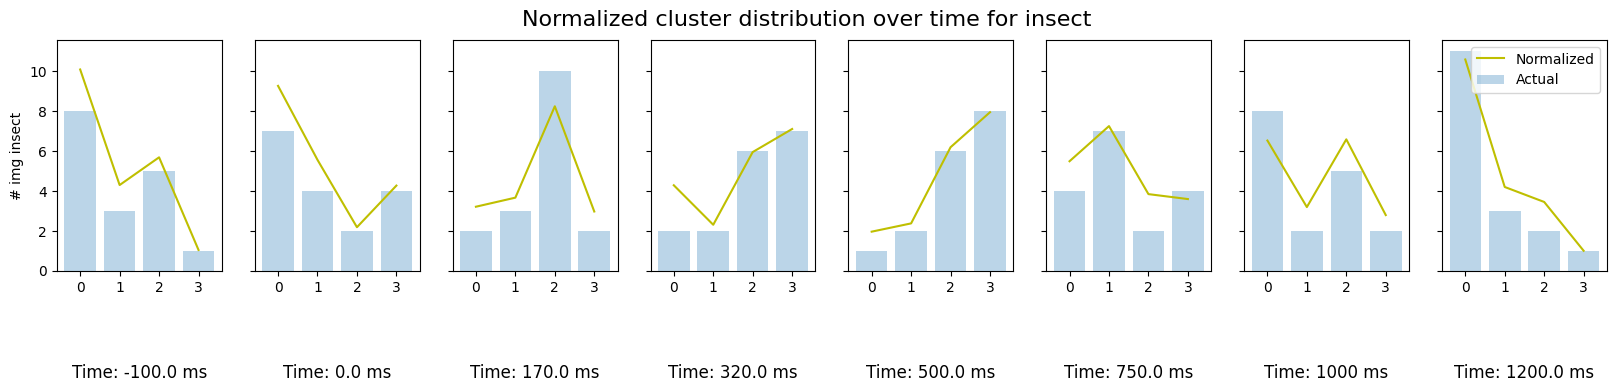

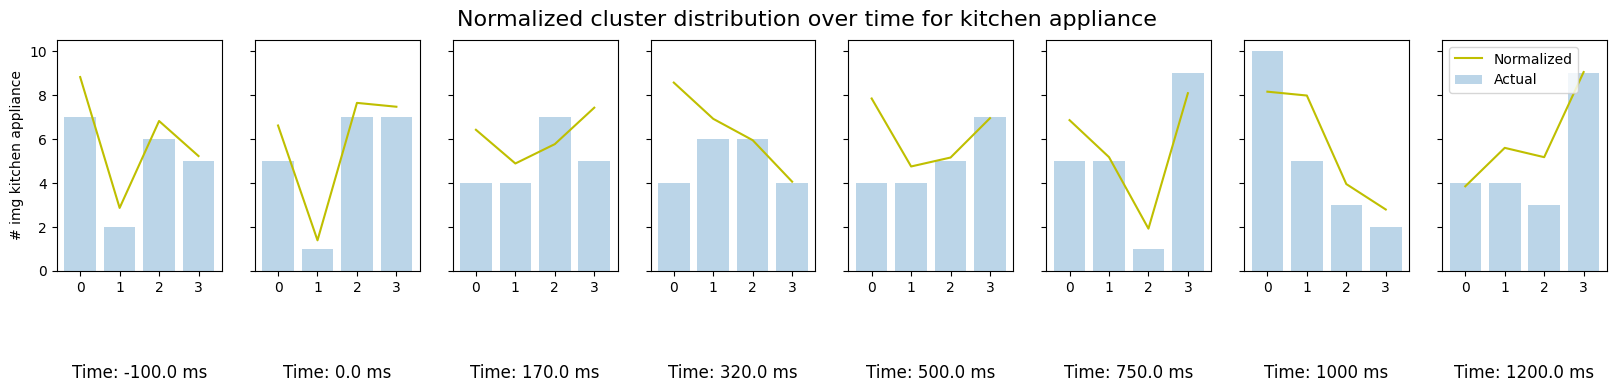

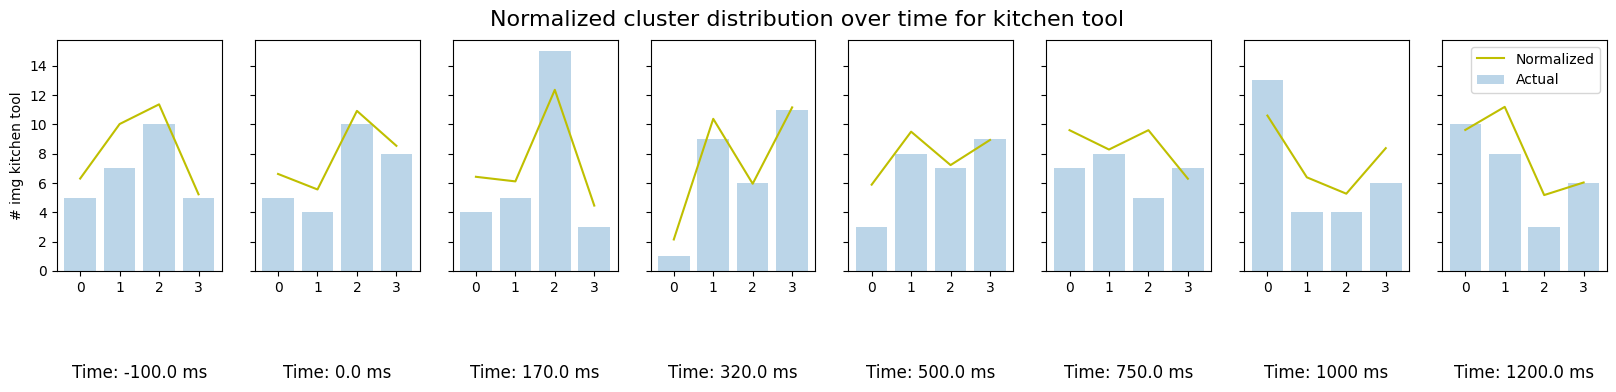

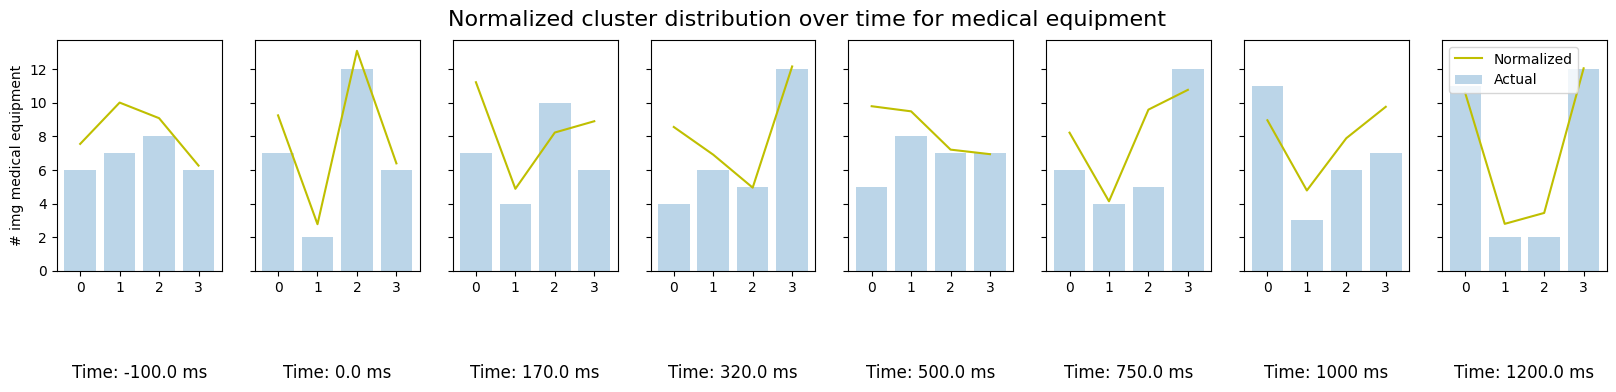

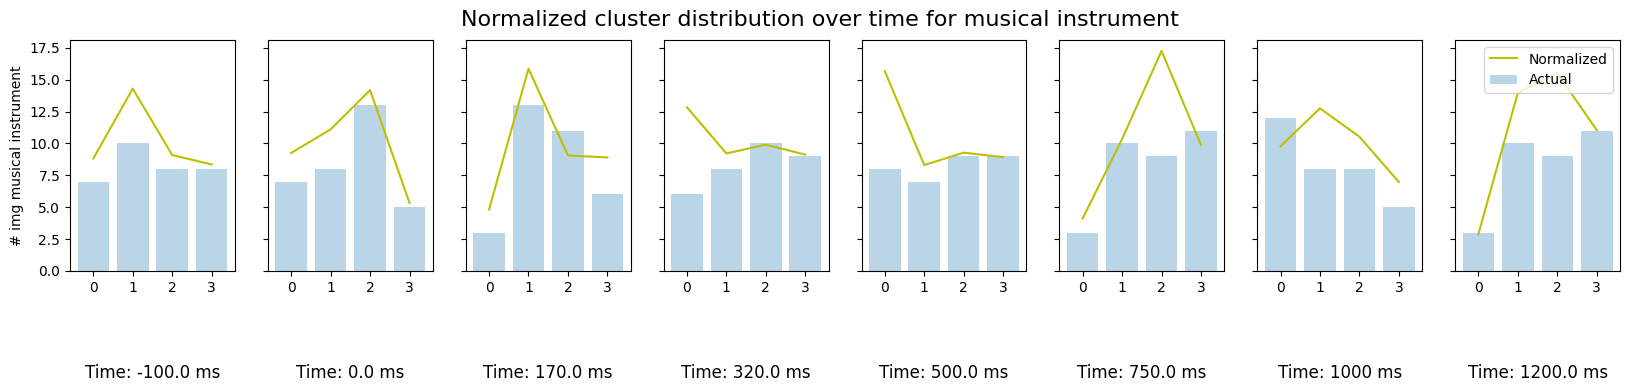

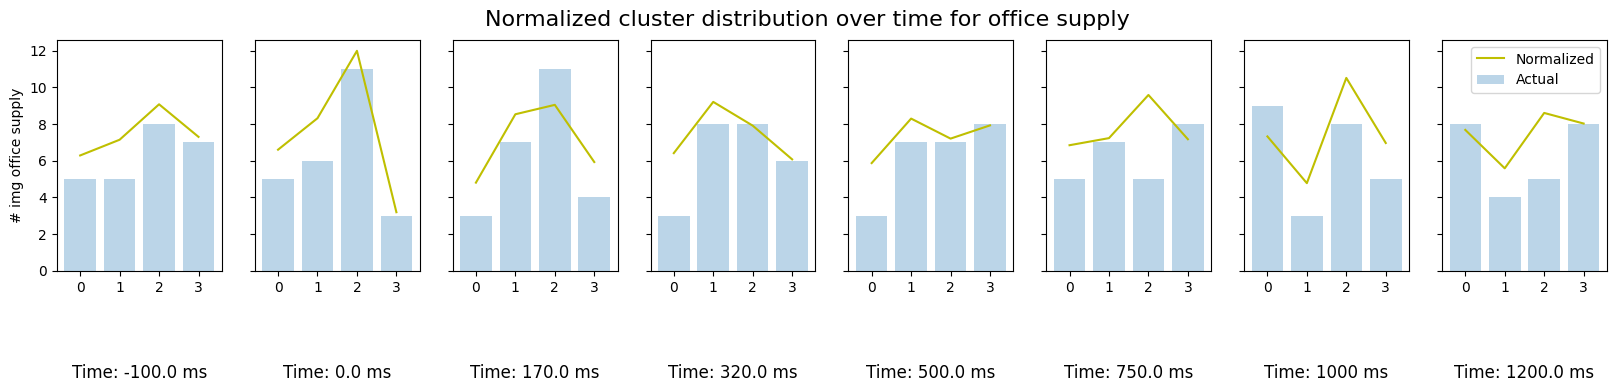

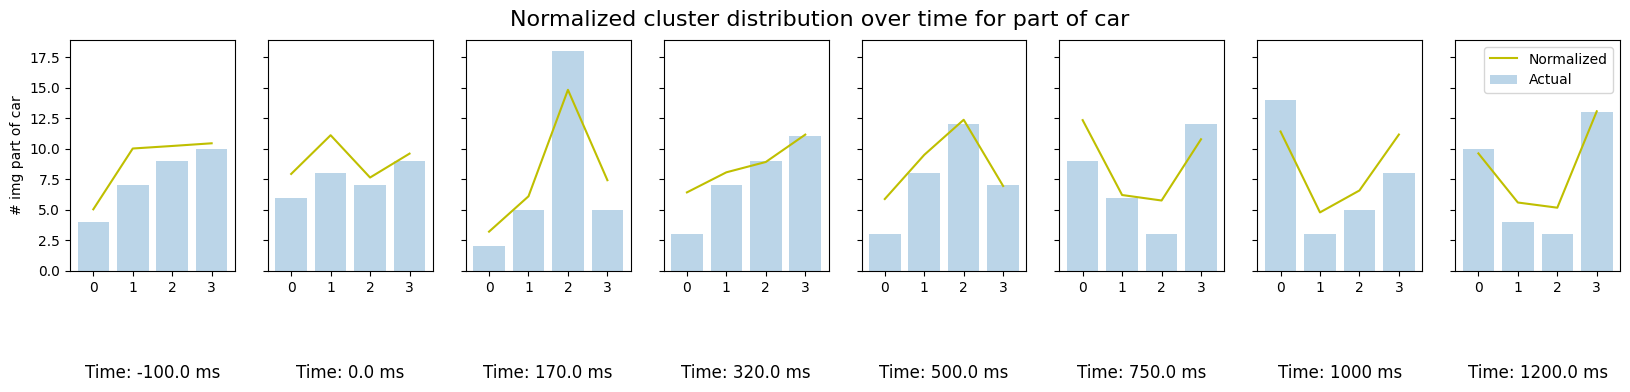

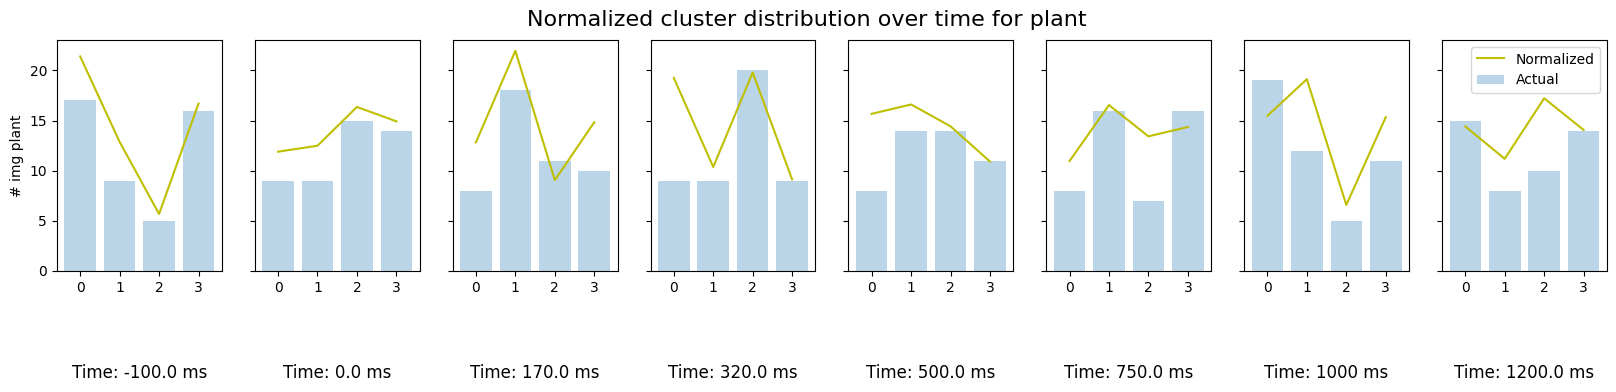

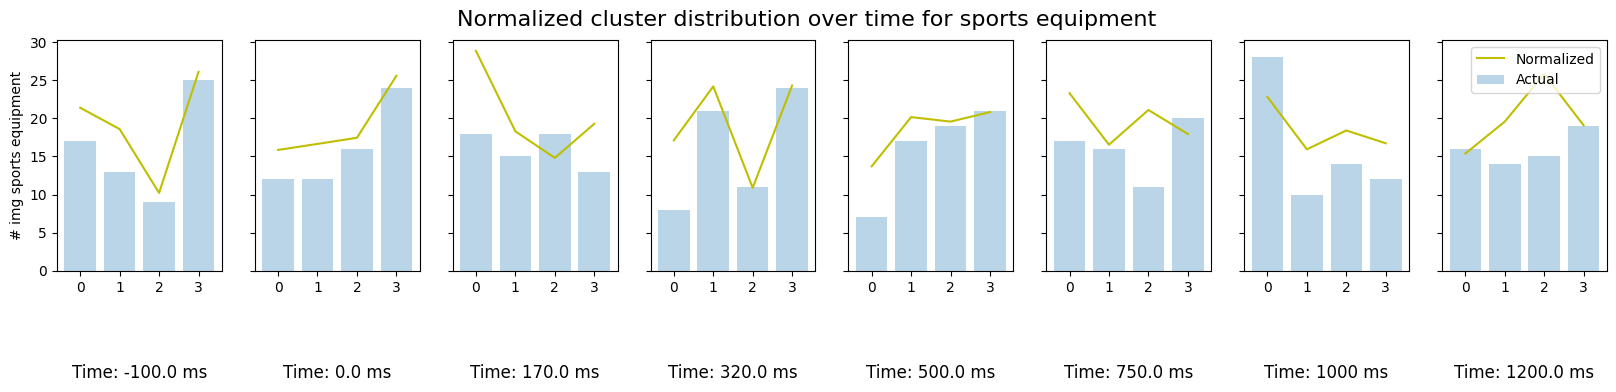

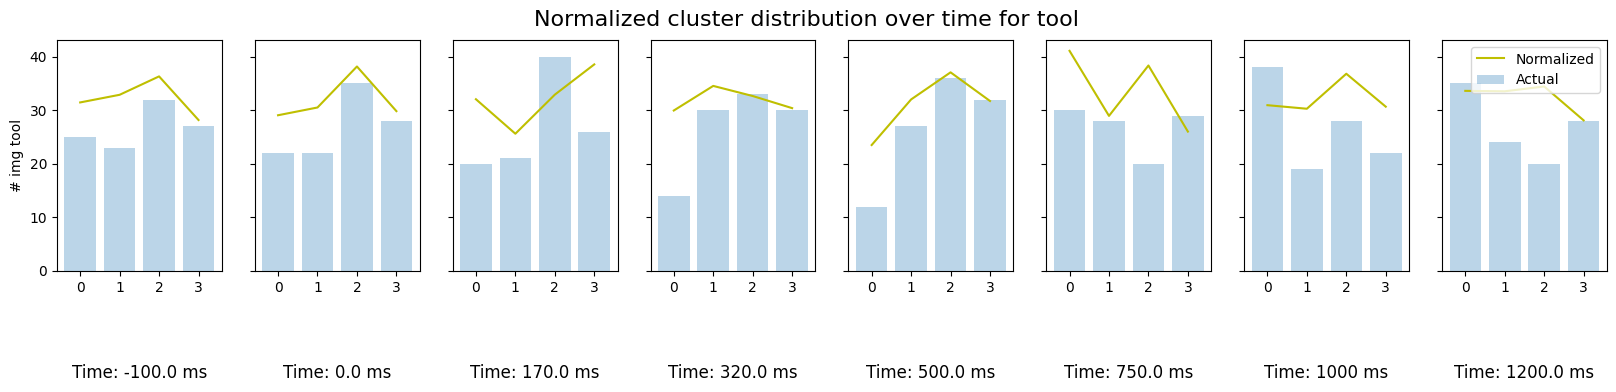

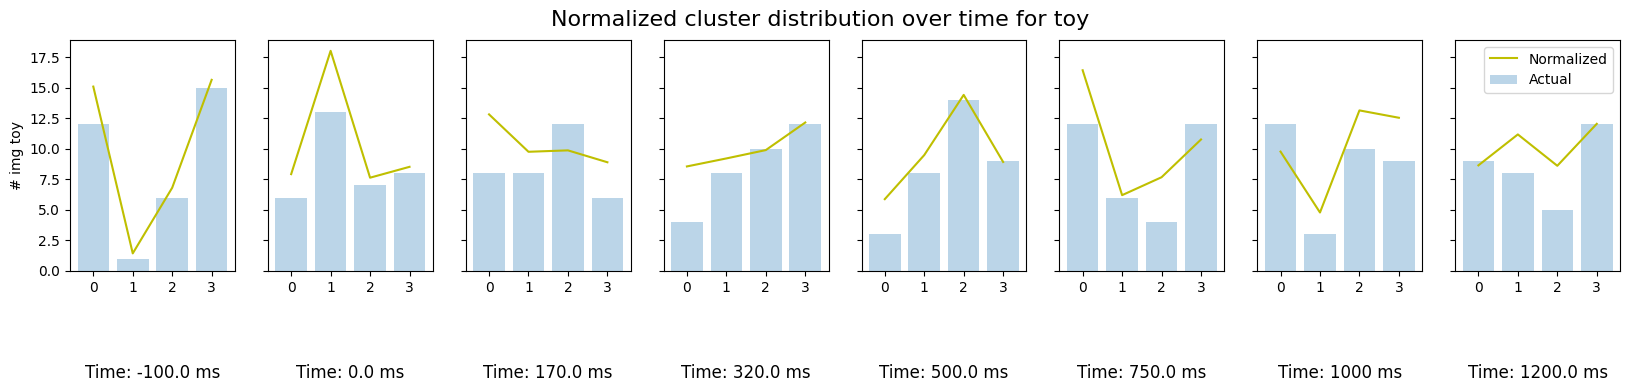

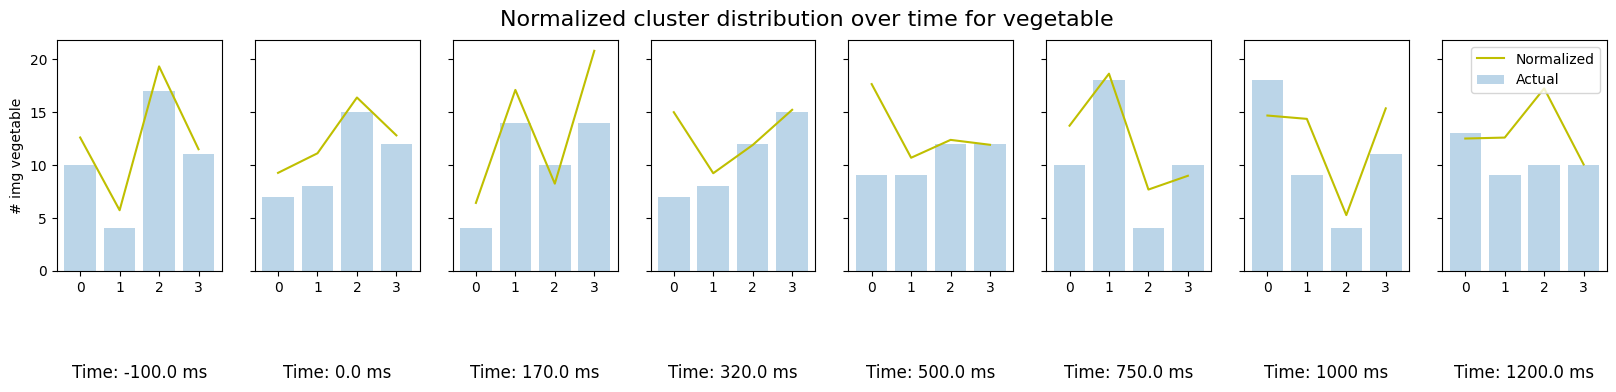

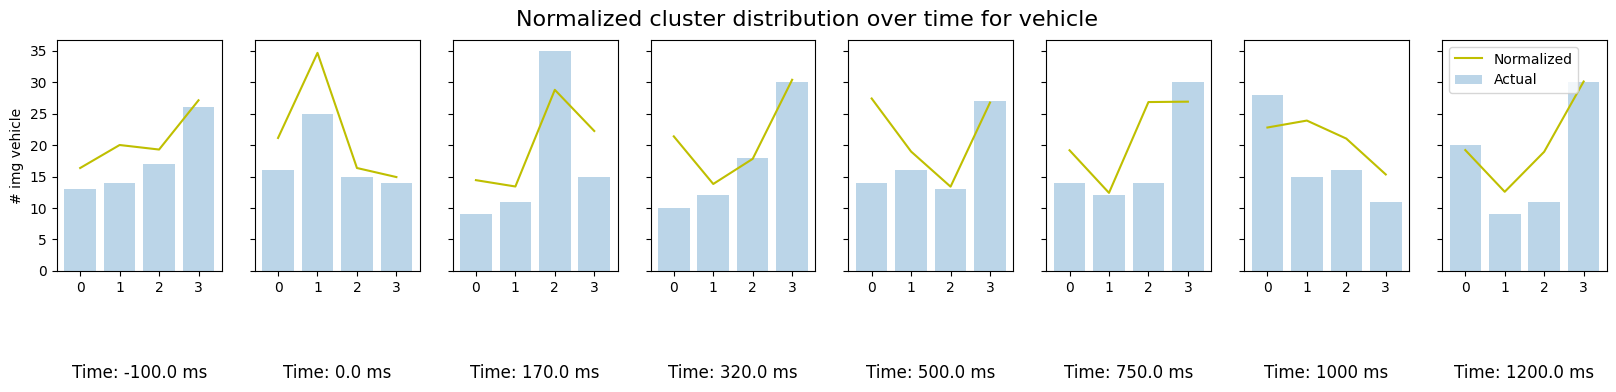

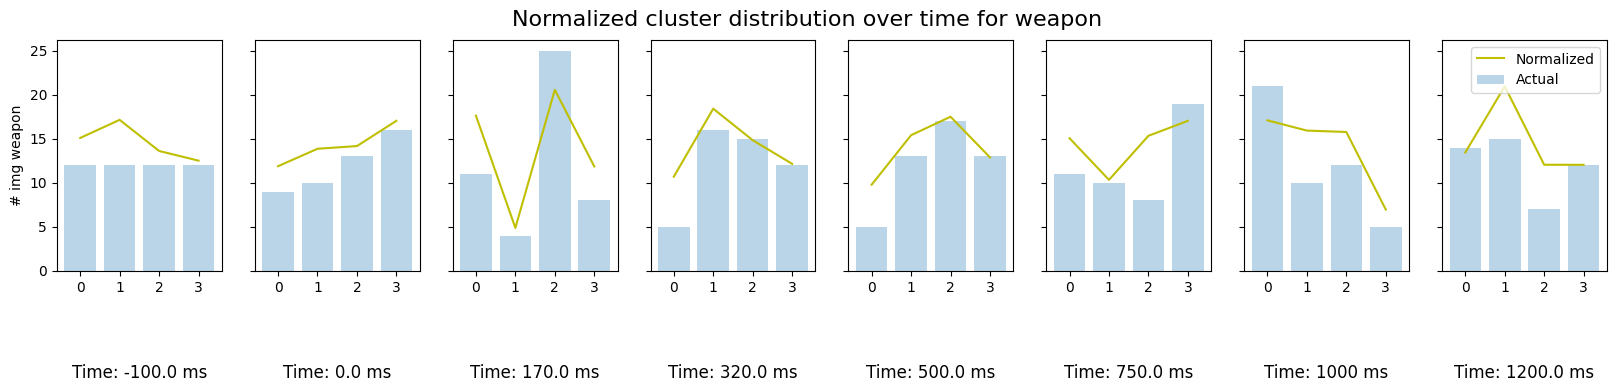

In [18]:
for category_name in (category27.columns):
    f, axes = plt.subplots(1, len(times), sharex=True, sharey = True, figsize=(20, 3))   
    plt.suptitle(f'Normalized cluster distribution over time for {category_name}', fontsize=16)
    for i,t in (enumerate(times)):
        index_0, index_1, index_2, index_3 = indices[t]
        category = np.where(category27[category_name] == 1)[0]
        category_0 = len(np.intersect1d(category, index_0))
        category_1 = len(np.intersect1d(category, index_1))
        category_2 = len(np.intersect1d(category, index_2))
        category_3 = len(np.intersect1d(category, index_3))
        # normalize wrt probabilites 
        norm_factor = 0.3
        prob_0 = category_0 / probabilites[t][0]*norm_factor
        prob_1 = category_1 / probabilites[t][1]*norm_factor
        prob_2 = category_2 / probabilites[t][2]*norm_factor
        prob_3 = category_3 / probabilites[t][3]*norm_factor


        # if category_0 + category_1 + category_2 + category_3 >=150:
        # plot these divisions are bar plot
        axes[i].bar(['0', '1', '2', '3'], [category_0, category_1, category_2, category_3], alpha = 0.3, label = 'Actual')    
        axes[i].plot(['0', '1', '2', '3'], [prob_0, prob_1, prob_2, prob_3], color = 'y', alpha = 1, label= 'Normalized')    
        axes[i].set_title(f"Time: {t*1000} ms", y = -0.5, fontsize=12)   
        axes[0].set_ylabel(f'# img {category_name}') 
    plt.legend()            
    plt.show()  

## CLuster experiments end here

Trying NMF on a few time points


In [19]:
from sklearn.decomposition import NMF

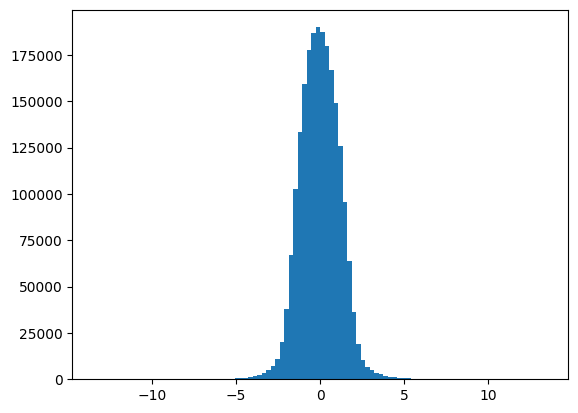

In [51]:
X = average_concept_epochs[:, :30, :]
plt.hist(X.flatten(), bins=100)
plt.show()

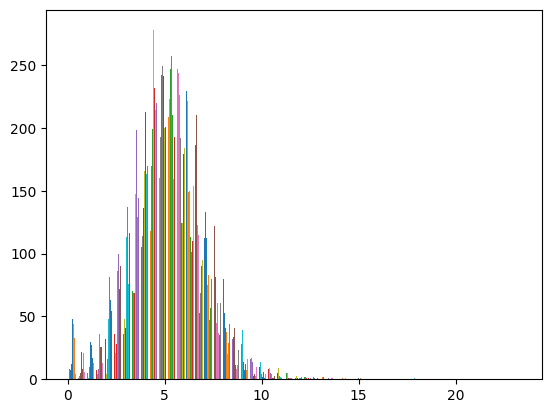

(1854, 39)

In [ ]:
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
index = epochs.times == 0.170
X = average_concept_epochs[:, index, :].squeeze()
X += 5
# remove data from X less than 0 without changing the shape
X = np.maximum(X, 0)
# X = X[X > 0]
# X.shape
# plt.hist(X, bins=50)         
# plt.show()
# X.shape

/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Categories which are best on component 0 are: [1158  784 1124 1762 1537 1845 1853  683  485 1227  728 1660  471  797
  769  344  424 1462 1155  569]
Categories which are best on component 1 are: [1251  263 1300 1378  276 1762 1136 1404 1242  816 1427 1449  577 1139
  505  710 1623  714  237  411]
Categories which are best on component 2 are: [ 978 1742  712  743   42 1425  474  302  588  912 1538 1440  756 1375
  960  222 1132  574 1130  406]
Component 0 is best loaded by the following image categories:


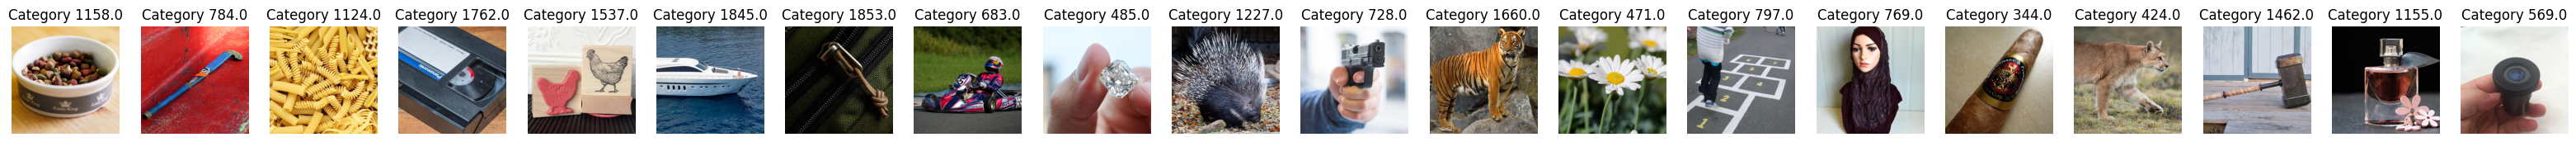

Component 1 is best loaded by the following image categories:


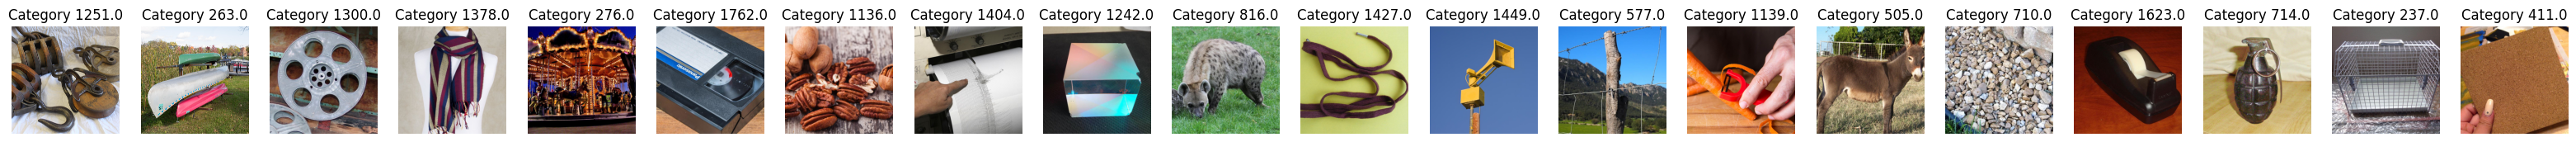

Component 2 is best loaded by the following image categories:


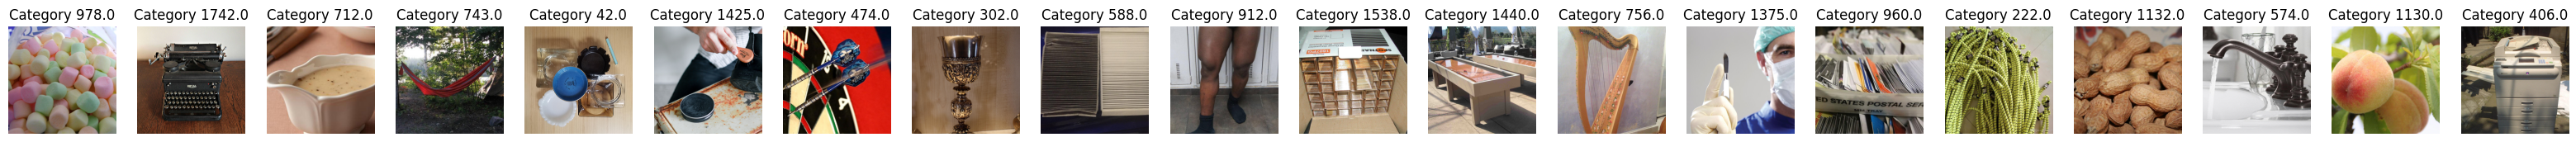

In [73]:

nmf_components = 3 # 3 mins for 30 components
model = NMF(n_components=nmf_components, random_state=40)
model.init = 'random'   
W = model.fit_transform(X)
H = model.components_
X_pred = np.dot(W, H)   
W.shape, H.shape, X_pred.shape  
nmf_components_vs_category = np.zeros((nmf_components, 20))
for i in range(nmf_components):
    sorted_indices = np.argsort(W[:,i])
    print(f'Categories which are best on component {i} are: {sorted_indices[-20:]}')
    nmf_components_vs_category[i,:] = sorted_indices[-20:]
# plot images for the top 5 categories for each component   
for component in range(nmf_components):
    if component > 20:
        break
    print(f"Component {component} is best loaded by the following image categories:")
    fig, axs = plt.subplots(1, 20, figsize=(40, 40))
    for i in range(20):
        category_nr = nmf_components_vs_category[component, i] 
        # Get the image paths for the given category_nr
        image_paths = epochs.metadata[(epochs.metadata['category_nr'] == category_nr) & (epochs.metadata['trial_type'] == 'exp')]['image_path']
        image_path = image_paths.iloc[0]
        image_path = f'../{image_path}'
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].set_title(f"Category {category_nr}")
        axs[i].axis('off')
    plt.show()

In [ ]:
# similarity matrix instead of reconstructing data matrix 

In [31]:
# correlation of dimensions with the categories

In [32]:
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
nmf_components = 4 # 3 mins for 30 components

for time in times:
    index = epochs.times == time
    X = average_concept_epochs[:, index, :].squeeze()
    X += abs(X.min())
    model = NMF(n_components=nmf_components)
    W = model.fit_transform(X)
    H = model.components_
    X_pred = np.dot(W, H)   
    nmf_components_vs_category = np.zeros((nmf_components, 10))
    print(f'For time {time*1000} ms')
    for i in range(nmf_components):
        sorted_indices = np.argsort(W[:,i])
        # print(f'Categories which are best on component {i} are: {sorted_indices[-10:]}')
        nmf_components_vs_category[i,:] = sorted_indices[-10:]
    # plot images for the top 5 categories for each component   
    for component in range(nmf_components):
        if component > 20:
            break
        print(f"Component {component} is best loaded by the following image categories:")
        # fig, axs = plt.subplots(1, 10, figsize=(20, 20))
        for i in range(10):
            category_nr = nmf_components_vs_category[component, i] 
            # Get the image paths for the given category_nr
            image_paths = epochs.metadata[(epochs.metadata['category_nr'] == category_nr) & (epochs.metadata['trial_type'] == 'exp')]['image_path']
            print(image_paths)
            # print(image_paths.iloc[0])
            # image_path = image_paths.iloc[0]
            # image_path = f'../{image_path}'
            # img = mpimg.imread(image_path)
            # axs[i].imshow(img)
            # axs[i].set_title(f"Category {category_nr}")
            # axs[i].axis('off')
        # plt.show()

For time -100.0 ms
Component 0 is best loaded by the following image categories:
247      images_meg/camera2/camera2_06s.jpg
3723     images_meg/camera2/camera2_10s.jpg
5985     images_meg/camera2/camera2_03s.jpg
7959     images_meg/camera2/camera2_04s.jpg
9908     images_meg/camera2/camera2_01b.jpg
13261    images_meg/camera2/camera2_11s.jpg
15408    images_meg/camera2/camera2_07s.jpg
16633    images_meg/camera2/camera2_09s.jpg
18330    images_meg/camera2/camera2_05s.jpg
20401    images_meg/camera2/camera2_02s.jpg
23629    images_meg/camera2/camera2_12s.jpg
24929    images_meg/camera2/camera2_08s.jpg
Name: image_path, dtype: object
105      images_meg/face_mask/face_mask_06s.jpg
3576     images_meg/face_mask/face_mask_10s.jpg
6291     images_meg/face_mask/face_mask_03s.jpg
7955     images_meg/face_mask/face_mask_04s.jpg
9655     images_meg/face_mask/face_mask_01b.jpg
11746    images_meg/face_mask/face_mask_11s.jpg
14509    images_meg/face_mask/face_mask_07s.jpg
16401    images_meg/fac